In [1]:
from tensorflow.keras.applications import ResNet50

conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(192, 192, 3))

conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 192, 192, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 198, 198, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 96, 96, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 96, 96, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [2]:
conv_base.trainable = False;

In [3]:
image_path = 'C:/Users/86138/Deep Learning and Neural Network/Final_Project/Data/images/Images/'
train_dir = 'C:/Users/86138/Deep Learning and Neural Network/Final_Project/30_Classes_Separated_Data/train/'
test_dir = 'C:/Users/86138/Deep Learning and Neural Network/Final_Project/30_Classes_Separated_Data/test/'
validation_dir = 'C:/Users/86138/Deep Learning and Neural Network/Final_Project/30_Classes_Separated_Data/validation/'

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', input_dim=6 * 6 * 2048))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3)) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(30, activation='softmax'))

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

image_size = 192
batch_size = 10

train_datagen = keras.preprocessing.image.ImageDataGenerator(
      #rotation_range=30,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #horizontal_flip=True,
      #zca_whitening=True, 
      #shear_range=0.2,
      #brightness_range=[0.9,1.1], 
      #zoom_range=0.1,
      rescale = 1/255.,
      preprocessing_function=None, dtype='float32')

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size), 
        color_mode='rgb', 
        classes=None, 
        interpolation='hamming',
        class_mode='categorical', 
        batch_size=batch_size,
        shuffle=True)

validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(image_size, image_size), 
        color_mode='rgb', 
        classes=None, 
        interpolation='hamming',
        class_mode='categorical', 
        batch_size=batch_size, 
        shuffle=False)


Found 3799 images belonging to 30 classes.
Found 831 images belonging to 30 classes.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 6, 6, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4718656   
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                2

In [7]:
from tensorflow.keras.optimizers import Adam
import PIL

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, decay=0, beta_1=0.9, beta_2=0.999),
              metrics=['accuracy'])

batch_size = 10
history = model.fit(
      train_generator,
      steps_per_epoch=3799//20,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 189 steps, validate for 50 steps
Epoch 1/20
189/189 [==============================] - 105s 555ms/step - loss: 3.6609 - accuracy: 0.0926 - val_loss: 3.5085 - val_accuracy: 0.0460
Epoch 2/20
189/189 [==============================] - 101s 537ms/step - loss: 2.7743 - accuracy: 0.2302 - val_loss: 3.6512 - val_accuracy: 0.0480
Epoch 3/20
189/189 [==============================] - 102s 540ms/step - loss: 2.3705 - accuracy: 0.3169 - val_loss: 3.6571 - val_accuracy: 0.0560
Epoch 4/20
189/189 [==============================] - 109s 574ms/step - loss: 1.9992 - accuracy: 0.4251 - val_loss: 3.7015 - val_accuracy: 0.0560
Epoch 5/20
189/189 [==============================] - 112s 595ms/step - loss: 1.7328 - accuracy: 0.4878 - val_loss: 3.7303 - val_accuracy: 0.0620
Epoch 6/20
189/189 [==============================] - 103s 547ms/step - loss: 1.5033 - accuracy: 0.5426 - val_loss: 3.7961 - val_accuracy: 0.0800
Epoch 7/20
189/189 [===========

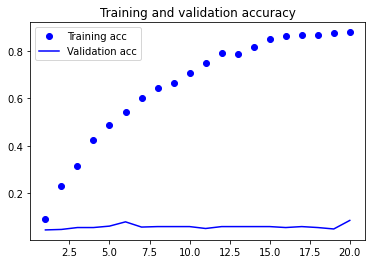

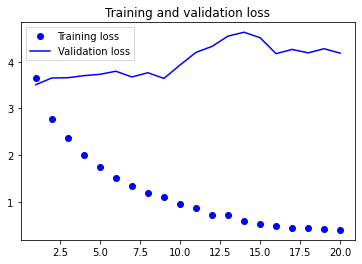

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
model_2 = models.Sequential()
model_2.add(conv_base)
model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu', input_dim=6 * 6 * 2048))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Dropout(0.5)) 
model_2.add(layers.Dense(30, activation='softmax'))
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 6, 6, 2048)        23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4718656   
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 30)                1950      
Total params: 28,308,574
Trainable params: 4,720,734
Non-trainable params: 23,587,840
__________________________________

In [13]:
model_2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

batch_size = 10
history = model_2.fit(
      train_generator,
      steps_per_epoch=3799//20,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 189 steps, validate for 50 steps
Epoch 1/20
189/189 [==============================] - 115s 607ms/step - loss: 2.7632 - accuracy: 0.2524 - val_loss: 3.7684 - val_accuracy: 0.0380
Epoch 2/20
189/189 [==============================] - 109s 576ms/step - loss: 1.7451 - accuracy: 0.5506 - val_loss: 3.6460 - val_accuracy: 0.0560
Epoch 3/20
189/189 [==============================] - 111s 586ms/step - loss: 1.3003 - accuracy: 0.6862 - val_loss: 3.6524 - val_accuracy: 0.0560
Epoch 4/20
189/189 [==============================] - 109s 576ms/step - loss: 0.9774 - accuracy: 0.7757 - val_loss: 3.7722 - val_accuracy: 0.0560
Epoch 5/20
189/189 [==============================] - 107s 565ms/step - loss: 0.7434 - accuracy: 0.8460 - val_loss: 3.7552 - val_accuracy: 0.0480
Epoch 6/20
189/189 [==============================] - 105s 558ms/step - loss: 0.5337 - accuracy: 0.8878 - val_loss: 3.8571 - val_accuracy: 0.0480
Epoch 7/20
189/189 [===========

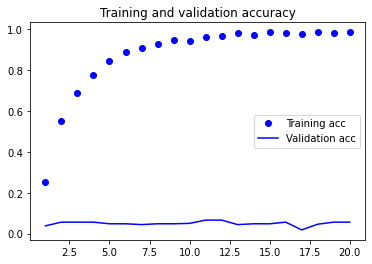

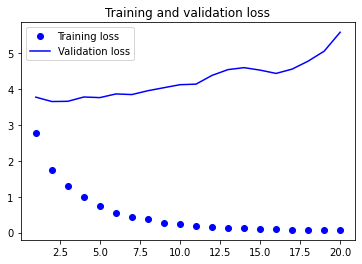

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:
model_3 = models.Sequential()
model_3.add(conv_base)
model_3.add(layers.Flatten())
model_3.add(layers.Dense(128, activation='relu', input_dim=6 * 6 * 2048))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dropout(0.5)) 

model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dropout(0.5)) 

model_3.add(layers.Dense(32, activation='relu'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dropout(0.5)) 

model_3.add(layers.Dense(30, activation='softmax'))
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 6, 6, 2048)        23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               9437312   
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)               

In [16]:
model_3.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

batch_size = 10
history_3 = model_3.fit(
      train_generator,
      steps_per_epoch=3799//20,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 189 steps, validate for 50 steps
Epoch 1/20
189/189 [==============================] - 133s 704ms/step - loss: 3.9421 - accuracy: 0.0497 - val_loss: 3.3454 - val_accuracy: 0.0600
Epoch 2/20
189/189 [==============================] - 120s 637ms/step - loss: 3.5146 - accuracy: 0.0884 - val_loss: 3.3894 - val_accuracy: 0.0600
Epoch 3/20
189/189 [==============================] - 127s 672ms/step - loss: 3.2112 - accuracy: 0.1190 - val_loss: 3.3141 - val_accuracy: 0.0600
Epoch 4/20
189/189 [==============================] - 118s 626ms/step - loss: 3.0825 - accuracy: 0.1265 - val_loss: 3.3496 - val_accuracy: 0.0600
Epoch 5/20
189/189 [==============================] - 129s 684ms/step - loss: 2.9039 - accuracy: 0.1699 - val_loss: 3.3252 - val_accuracy: 0.0600
Epoch 6/20
189/189 [==============================] - 130s 689ms/step - loss: 2.7886 - accuracy: 0.1975 - val_loss: 3.3043 - val_accuracy: 0.0600
Epoch 7/20
189/189 [===========

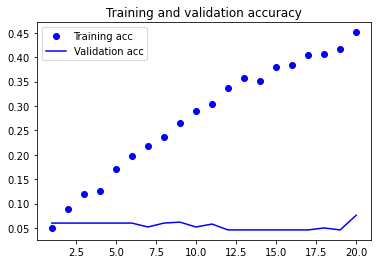

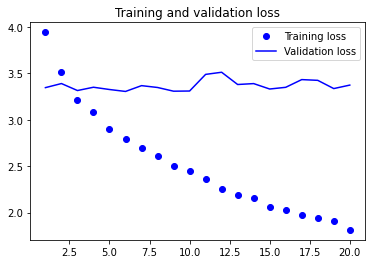

In [17]:
import matplotlib.pyplot as plt
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy'] 
loss = history_3.history['loss'] 
val_loss = history_3.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()